# Chapter 02
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [7]:
!pip install mlba

In [8]:
# Import required packages
import mlba
import pandas as pd

# Load data
housing_df = mlba.load_data('WestRoxbury.csv')
housing_df.shape   # find the dimension of data frame
housing_df.head()  # show the first five rows
print(housing_df)  # show all the data

# Rename columns: replace spaces with '_' to allow dot notation
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'}) # explicit
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns] # all columns

# Practice showing the first four rows of the data
housing_df.loc[0:3]  # loc[a:b] gives rows a to b, inclusive
housing_df.iloc[0:4]  # iloc[a:b] gives rows a to b-1

# Different ways of showing the first 10 values in column TOTAL_VALUE
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']
housing_df.iloc[0:10].TOTAL_VALUE  # use dot notation if the column name has no spaces

# Show the fifth row of the first 10 columns
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]
housing_df.iloc[4:5, 0:10]  # use a slice to return a data frame

# Use pd.concat to combine non-consecutive columns into a new data frame.
# The axis argument specifies the dimension along which the
# concatenation happens, 0=rows, 1=columns.
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

# To specify a full column, use:
housing_df.iloc[:,0:1]
housing_df.TOTAL_VALUE
housing_df['TOTAL_VALUE'][0:10]  # show the first 10 rows of the first column

# Descriptive statistics
print('Number of rows ', len(housing_df['TOTAL_VALUE'])) # show length of first column
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean()) # show mean of column
housing_df.describe() # show summary statistics for each column

no display found. Using non-interactive Agg backend
      TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0            344.2  4330       9965      1880         2436         1352   
1            412.6  5190       6590      1945         3108         1976   
2            330.1  4152       7500      1890         2294         1371   
3            498.6  6272      13773      1957         5032         2608   
4            331.5  4170       5000      1910         2370         1438   
...            ...   ...        ...       ...          ...          ...   
5797         404.8  5092       6762      1938         2594         1714   
5798         407.9  5131       9408      1950         2414         1333   
5799         406.5  5113       7198      1987         2480         1674   
5800         308.7  3883       6890      1946         2000         1000   
5801         447.6  5630       7406      1950         2510         1600   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HAL

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# random sample of 5 houses
housing_df.sample(5)

# oversample houses with over 10 rooms
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

# stratified sampling of houses by remodeling state
housing_df.groupby('REMODEL', dropna=False).sample(frac=0.8)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
2647,419.04,5271,10875,1950,3314,1683,1.5,7,4,2,0,1,1,Old
5733,397.90,5005,5000,1935,2247,1230,2.0,6,3,2,0,1,1,Old
2694,426.90,5370,6500,1890,3558,2014,2.0,8,4,2,0,1,0,Old
4272,432.50,5440,3917,1930,2560,1456,2.0,6,3,1,0,1,1,Old
953,347.40,4370,6990,1950,2689,1377,1.5,5,3,1,1,1,0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,437.00,5497,4560,1890,3378,2039,2.0,8,4,1,1,1,1,NaN
2333,417.00,5245,7500,1920,2462,1410,2.0,7,4,1,1,1,1,NaN
2512,554.90,6980,20046,1886,5264,3002,2.0,8,5,2,1,1,2,NaN
3659,319.70,4021,3554,1962,2664,1258,1.0,7,3,2,0,1,1,NaN



Note the addition of the keyword argument `dropna` in the third example. The `REMODEL` column contains missing values and by default, `groupby` will drop these records. By setting `dropna=False`, we retain the missing values in the sample.

In [11]:
housing_df.dtypes[['TOTAL_VALUE', 'FLOORS', 'REMODEL']]  # print the data type

housing_df.columns  # print a list of variables

# REMODEL needs to be converted to a categorical variable after
# replacing the missing values with 'None'
housing_df.REMODEL = housing_df.REMODEL.fillna('None').astype('category')
housing_df.REMODEL.cat.categories  # Show number of categories
housing_df.REMODEL.dtype  # Check type of converted variable

CategoricalDtype(categories=['None', 'Old', 'Recent'], ordered=False, categories_dtype=object)

In [12]:
# the missing values will create a third category
# use the arguments drop_first and dummy_na to control the outcome
housing_df = pd.get_dummies(housing_df, prefix_sep='_', dummy_na=True, dtype=int)
housing_df.loc[:, 'REMODEL_None':'REMODEL_Recent'].head(5)

,REMODEL_None,REMODEL_Old,REMODEL_Recent
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
# To illustrate missing data procedures, we first convert a few entries for
# bedrooms to NA's. Then we impute these missing values using the median of the
# remaining values.
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NA: ',
      housing_df['BEDROOMS'].count())

# remove rows with missing values
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

# replace the missing values using the median of the remaining values.
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after setting to NA:  5792
Number of rows after removing rows with missing values:  5792
Number of rows with valid BEDROOMS values after filling NA values:  5802


In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()

# Normalizing a data frame

# pandas:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()

# scikit-learn:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df),
                       index=housing_df.index, columns=housing_df.columns)
# the result of the transformation is a numpy array, we convert it into a data frame

# Rescaling a data frame

# pandas:
norm_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())

# scikit-learn:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df),
                       index=housing_df.index, columns=housing_df.columns)

In [15]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'Expenditure': [239, 364,602, 644, 770, 789, 911],
                'Revenue': [514, 789, 550, 1386, 1394, 1440, 1354]})
%matplotlib inline

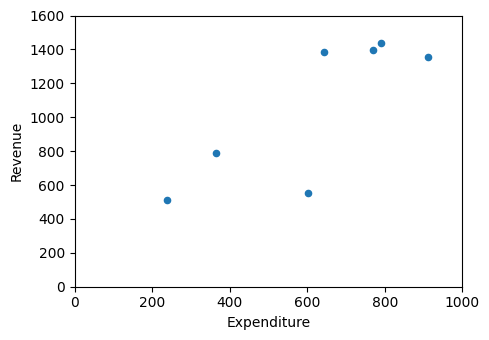

In [16]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.tight_layout()
plt.show()

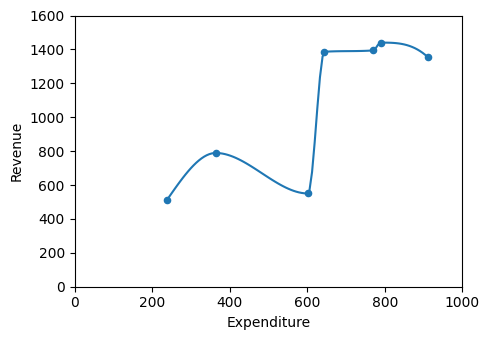

In [17]:
x = list(df.Expenditure)
y = list(df.Revenue)

from scipy import interpolate
f = interpolate.PchipInterpolator(x, y)

x_new = np.linspace(x[0], x[-1], 100)
y_new = [f(xi) for xi in x_new]
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.plot(x_new, y_new)
plt.tight_layout()
plt.show()

In [18]:
# random_state is set to a defined value to get the same partitions when re-running
# the code
# training (60%) and holdout (40%)
trainData, holdoutData = train_test_split(housing_df, test_size=0.40, random_state=1)

print('Training   : ', trainData.shape)
print('Holdout    : ', holdoutData.shape)
print()

# training (50%), validation (30%), and holdout (20%)
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, holdoutData = train_test_split(temp, test_size=0.4, random_state=1)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Holdout    : ', holdoutData.shape)

Training   :  (3481, 17)
Holdout    :  (2321, 17)

Training   :  (2901, 17)
Validation :  (1740, 17)
Holdout    :  (1161, 17)


In [19]:
Training   :  (3481, 15)
Holdout    :  (2321, 15)

Training   :  (2901, 15)
Validation :  (1741, 15)
Holdout    :  (1160, 15)

In [20]:
from sklearn.linear_model import LinearRegression

# data loading and preprocessing
housing_df = mlba.load_data('WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df.REMODEL = housing_df.REMODEL.fillna('None').astype('category')
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

# create list of predictors and outcome
excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [column for column in housing_df.columns if column not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, holdout_X, train_y, holdout_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y,
    'predicted': train_pred,
    'residual': train_y - train_pred,
})
train_results.head()

,TOTAL_VALUE,predicted,residual
2024,392.0,387.726258,4.273742
5140,476.3,430.785540,45.514460
5259,367.4,384.042952,-16.642952
421,350.3,369.005551,-18.705551
1401,348.1,314.725722,33.374278



The expression `[column for column in housing_df.columns if s not in excludeColumns]` is a so-called list comprehension. It is a compact way to create a list from another list, with the condition that the element is not in the list of excluded columns. The way to read it is:
> for each column name in the list of column names,
>     if column name is not in the list of excluded columns, include it in the new list.

In [21]:
holdout_pred = model.predict(holdout_X)
holdout_results = pd.DataFrame({
    'TOTAL_VALUE': holdout_y,
    'predicted': holdout_pred,
    'residual': holdout_y - holdout_pred,
})
holdout_results.head()

,TOTAL_VALUE,predicted,residual
1822,462.0,406.946377,55.053623
1998,370.4,362.888928,7.511072
5126,407.4,390.287208,17.112792
808,316.1,382.470203,-66.370203
4034,393.2,434.334998,-41.134998


In [22]:
# import the utility function regressionSummary
from mlba import regressionSummary

# training set
regressionSummary(y_true=train_results.TOTAL_VALUE, y_pred=train_results.predicted)

# holdout set
regressionSummary(y_true=holdout_results.TOTAL_VALUE, y_pred=holdout_results.predicted)


Regression statistics

Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 43.0306
Mean Absolute Error (MAE) : 32.6042
Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886

Regression statistics

Mean Error (ME) : -0.1463
Root Mean Squared Error (RMSE) : 42.7292
Mean Absolute Error (MAE) : 31.9663
Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


In [23]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})
print(new_data)

print('Predictions: ', model.predict(new_data))

   LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [384.47210285 378.06696706 386.01773842]



## 1. Data Overview and Structure

The West Roxbury housing dataset contains 5,802 observations and multiple structural and property-related variables such as lot size, year built, gross area, number of rooms, and total property value.

The summary statistics show that the average house value is approximately $392.7 (in thousands), with a standard deviation of about 99.2, indicating moderate variability in property prices. Most homes were built around 1937 on average, and the typical house has about 7 rooms and 3 bedrooms.

The dataset appears well-structured and sufficiently large for predictive modeling.



## 2. Sampling Techniques

Different sampling techniques were demonstrated:

- **Simple random sampling** selects houses purely at random, ensuring each observation has equal probability.
- **Weighted sampling** oversampled houses with more than 10 rooms, illustrating how probability weights can intentionally bias the sample toward specific characteristics.
- **Stratified sampling** based on the `REMODEL` variable ensured proportional representation of remodeling categories.

These techniques highlight how sampling strategies can significantly influence the composition and representativeness of a dataset.



## 3. Data Preprocessing and Feature Engineering

The `REMODEL` variable was converted into a categorical variable and then transformed into dummy variables. This is necessary because regression models require numerical inputs. Creating dummy variables allows categorical information (None, Old, Recent) to be incorporated into the model.

Missing values were artificially introduced in the `BEDROOMS` variable and then handled in two ways:
- Removing rows with missing values reduced the dataset size.
- Imputing missing values with the median preserved the full dataset.

This demonstrates the trade-off between data retention and potential information loss when handling missing data.



## 4. Data Partitioning

The dataset was split into:
- 60% training and 40% holdout
- 50% training, 30% validation, 20% holdout

The partitions were reproducible using a fixed `random_state`. Proper data splitting is crucial to prevent overfitting and to evaluate how well the model generalizes to unseen data.



## 5. Linear Regression Model Performance

The linear regression model was trained to predict `TOTAL_VALUE`.

Training performance:
- RMSE ≈ 43.03  
- MAE ≈ 32.60  
- MAPE ≈ 8.49%

Holdout performance:
- RMSE ≈ 42.73  
- MAE ≈ 31.97  
- MAPE ≈ 8.33%

The holdout error metrics are very close to the training metrics, indicating that the model generalizes well and does not suffer from significant overfitting. The small mean error (close to zero) suggests the model is approximately unbiased.



## 6. Residual Analysis

The residuals (actual − predicted values) show both positive and negative values, meaning the model sometimes overestimates and sometimes underestimates property values.

The magnitude of residuals suggests that while the model performs reasonably well, there is still unexplained variability, likely due to omitted variables or nonlinear relationships.



## 7. Interpolation Visualization (Expenditure vs Revenue)

The scatterplot shows a smooth, nonlinear relationship between expenditure and revenue. This illustrates how interpolation can help visualize underlying patterns without assuming a strict linear relationship.



## 8. Predictions on New Data

When predicting house values for new observations, the model produced values in a similar range despite differences in structural features.

This suggests that the model balances multiple contributing factors rather than relying heavily on a single variable.



## Overall Conclusion

The analysis demonstrates a complete machine learning workflow:

- Data exploration and preprocessing  
- Sampling strategies  
- Handling missing values  
- Categorical encoding  
- Train/validation/test splitting  
- Linear regression modeling  
- Model evaluation and prediction  

The model achieves stable and consistent performance across training and holdout sets, indicating good generalization. However, residual variability suggests that more complex models or additional predictors could potentially improve accuracy.
